# 10000 Common passwords of users
The dataset lists 10000 most common passwords for various websites from the users. The goal of the datsets is to display the importance of a more complicated password to the safety of internet privacy. If a user's password is in the dataset, then the user should consider changing the password because the hacker can easily obtain his password and confidential information. Here is the URL of the dataset, it is from Kaggle: https://www.kaggle.com/shivamb/10000-most-common-passwords
<br>
Here are two interesting questions, which will be answered later in this file.

# Question 1) Among 10000 passwords, is there any repeated items? If it is, what is the password that is the most common one. (Appear the most)

# Question 2) What are the ranking of the length of common passwords?

# Question 3) What might be a good choice of passwords?

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('common_passwords.csv')
print(dataset.columns)
dataset.head(10)


Index(['password', 'length', 'num_chars', 'num_digits', 'num_upper',
       'num_lower', 'num_special', 'num_vowels', 'num_syllables'],
      dtype='object')


,password,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
0,123456,6,0,6,0,0,0,0,1
1,password,8,8,0,0,8,0,2,2
2,12345678,8,0,8,0,0,0,0,1
3,qwerty,6,6,0,0,6,0,1,3
4,123456789,9,0,9,0,0,0,0,1
5,12345,5,0,5,0,0,0,0,1
6,1234,4,0,4,0,0,0,0,1
7,111111,6,0,6,0,0,0,0,1
8,1234567,7,0,7,0,0,0,0,1
9,dragon,6,6,0,0,6,0,2,2


In [11]:
dataset.describe()

,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.651300,5.030300,1.617600,0.025300,5.005000,0.003400,1.805900,1.606600
std,1.370947,2.804098,2.971911,0.322909,2.809727,0.119958,1.242409,0.681383
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000
50%,7.000000,6.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000
75%,8.000000,7.000000,1.000000,0.000000,7.000000,0.000000,3.000000,2.000000
max,16.000000,13.000000,12.000000,8.000000,13.000000,6.000000,10.000000,6.000000


<AxesSubplot:xlabel='length'>

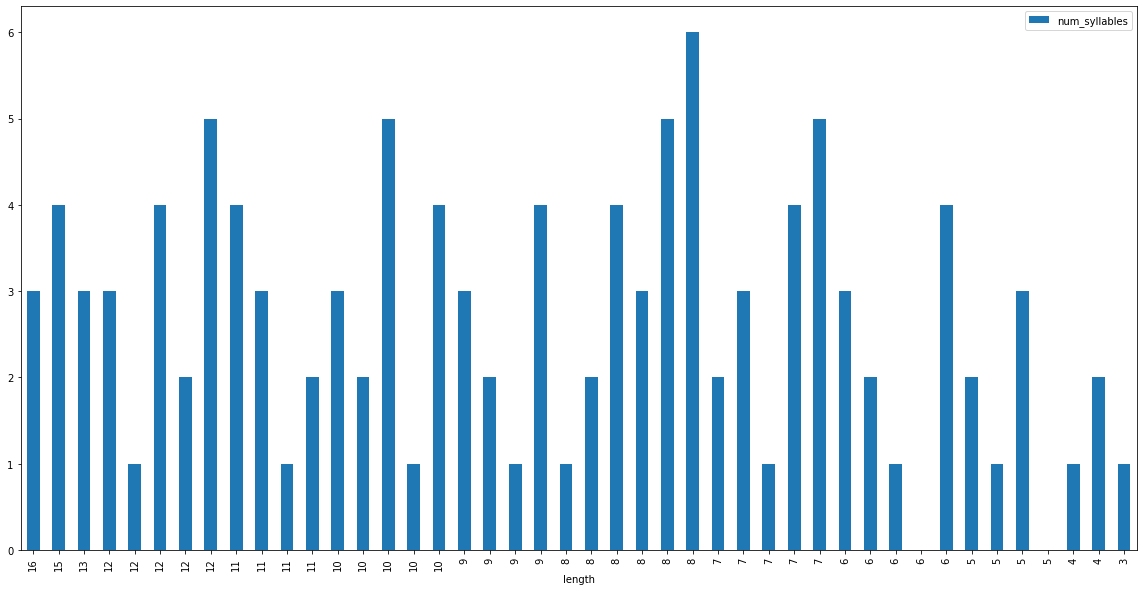

In [187]:
#Some random plot of the dataset
random_plot = dataset.sort_values(by='length', ascending=False)[['length', 'num_syllables']].drop_duplicates()
random_plot.plot(x = 'length', y = 'num_syllables', kind = 'bar', figsize=(20, 10))

In [70]:
#Question 1
count_group_password = dataset.groupby('password')['password'].count()
sorted_count = count_group_password.sort_values(ascending=False, inplace = False).reset_index(name = "count")
sorted_count[sorted_count['count'] > 1]


,password,count
0,0,6
1,7,3
2,123,3
3,7007,2
4,987654321,2
5,10101,2
6,easy,2
7,1234567,2
8,12345,2
9,123456789,2


        frequency
length           
6            3175
8            2971
7            1771
5             903
4             809
9             219
10             94
11             28
12             21
3               3
13              2
15              1
16              1


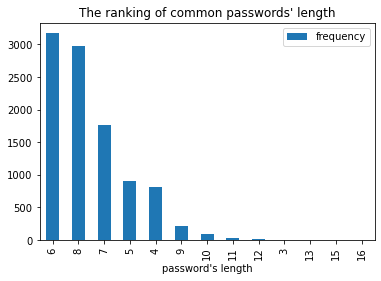

In [169]:
#Question 2
pass_length = dataset.groupby(['password', 'length']).size().sort_values(ascending =False, inplace = False).reset_index(name = 'count').sort_values(by=['length'])
pass_length = pass_length.groupby('length').size().reset_index(name='frequency')
pivot = pass_length.pivot_table(pass_length, index = ['length']).sort_values(by="frequency", ascending=False)
pivot.plot(y = 'frequency', use_index = True, kind = "bar", title = "The ranking of common passwords' length", xlabel = "password's length" )
print(pivot)



In [168]:
#Question 3
long_pass = dataset.groupby(['password', 'length', 'num_syllables', "num_special","num_chars"]).size().sort_values(ascending =False).reset_index(name = 'count').sort_values(by=['length'])

long_pass[(long_pass['length']>=8) & (long_pass['num_special']!=0) & (long_pass["num_chars"] !=0)]

,password,length,num_syllables,num_special,num_chars,count
4749,sasha_007,9,1,1,5,1


# Discussion Cell:
# Question 1) 
As it shown from the chart, the password "0" appear 6 times among 10000 the most common password. And among all passwords that appear more than one time on the chart, most of them are formed by digits. Only "abcdef" and "easy" are consist of letters. This can reflect that, people who have simple password do not have combination of different characters. They simply use all digits or all letters. 





# Question 2) 
According to the bar chart, among 10000 most common passwords, the password with length of 6 appeared the most (3175 times). The frequency of passwords dropped significantly once the length exceeded 10. This reflect that people prefer relatively shorter passwords, which is easier to type and remember. However, this will give the hackers a chance to steal users' personal information. 





# Question 3) 
A good password should be at least 8 characters long, it should contain letters, digits, and special signs (like question marks, underscore). Among all common passwords, there is only one password that can be considered as relatively safe. However, it does not have variation of capitalization for the letters. Take sasha_007 as an example, to be really safe, there should be some change of letter capitalization, such as change the last "a" to "A".